In [1546]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
warnings.filterwarnings('ignore')

## Data Inspection

In [1547]:
df = pd.read_csv('auto-mpg.csv')

In [1548]:
df.shape

(398, 9)

In [1549]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [1550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [1551]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [1552]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [1553]:
df.cylinders.value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

In [1554]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [1555]:
df.acceleration.unique()

array([12. , 11.5, 11. , 10.5, 10. ,  9. ,  8.5,  8. ,  9.5, 15. , 15.5,
       16. , 14.5, 20.5, 17.5, 12.5, 14. , 13.5, 18.5, 19. , 13. , 19.5,
       18. , 17. , 23.5, 16.5, 21. , 16.9, 14.9, 17.7, 15.3, 13.9, 12.8,
       15.4, 17.6, 22.2, 22.1, 14.2, 17.4, 16.2, 17.8, 12.2, 16.4, 13.6,
       15.7, 13.2, 21.9, 16.7, 12.1, 14.8, 18.6, 16.8, 13.7, 11.1, 11.4,
       18.2, 15.8, 15.9, 14.1, 21.5, 14.4, 19.4, 19.2, 17.2, 18.7, 15.1,
       13.4, 11.2, 14.7, 16.6, 17.3, 15.2, 14.3, 20.1, 24.8, 11.3, 12.9,
       18.8, 18.1, 17.9, 21.7, 23.7, 19.9, 21.8, 13.8, 12.6, 16.1, 20.7,
       18.3, 20.4, 19.6, 17.1, 15.6, 24.6, 11.6])

In [1556]:
df.origin.value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

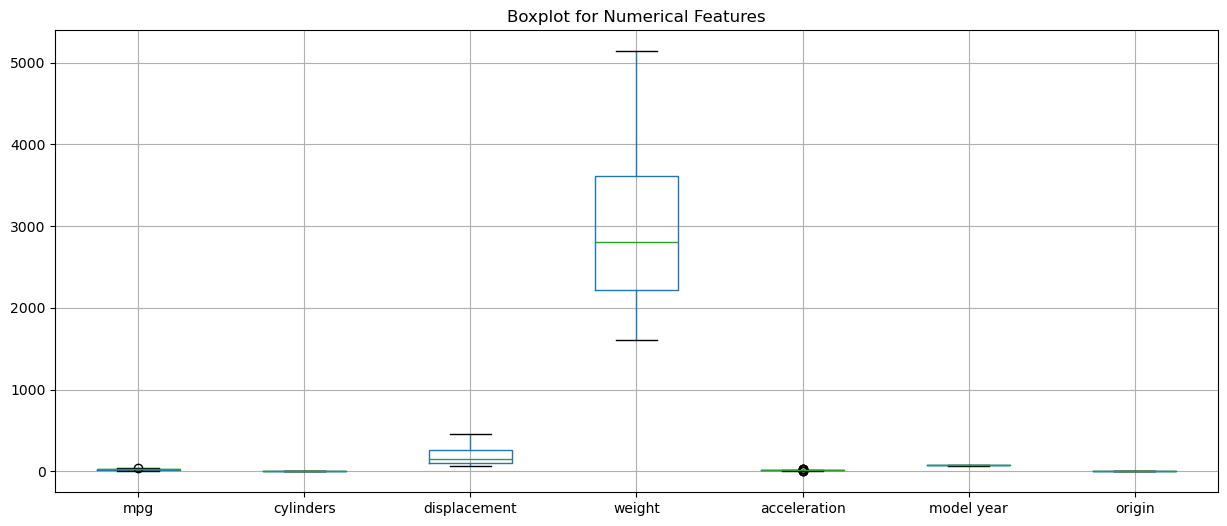

In [1557]:
df.select_dtypes(include=['int64', 'float64']).boxplot(figsize=(15,6))
plt.title("Boxplot for Numerical Features")
plt.show()

In [1558]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

mpg: 1 outliers
cylinders: 0 outliers
displacement: 0 outliers
weight: 0 outliers
acceleration: 7 outliers
model year: 0 outliers
origin: 0 outliers


## Data Preprocessing

In [1559]:
df['horsepower'].replace('?', np.nan, inplace=True)

In [1560]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', nan, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [1561]:
df['horsepower'] = df.horsepower.astype('float')

In [1562]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

mpg: 1 outliers
cylinders: 0 outliers
displacement: 0 outliers
horsepower: 10 outliers
weight: 0 outliers
acceleration: 7 outliers
model year: 0 outliers
origin: 0 outliers


In [1563]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [1564]:
df["car name"] = df["car name"].str.split(" ", expand=True)[0]

In [1565]:
df["car name"].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [1566]:
df["car name"] = df["car name"].replace("chevroelt","chevrolet")
df["car name"] = df["car name"].replace("chevy","chevrolet")

df["car name"] = df["car name"].replace("vokswagen","volkswagen")
df["car name"] = df["car name"].replace("vw","volkswagen")

df["car name"] = df["car name"].replace("maxda","mazda")

df["car name"] = df["car name"].replace("mercedes-benz","mercedes")

df["car name"] = df["car name"].replace("toyouta","toyota")

df["car name"] = df["car name"].replace("mercury","ford")
df["car name"] = df["car name"].replace("capri","ford")



In [1567]:
df["car name"].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'hi', 'opel', 'fiat', 'oldsmobile', 'chrysler',
       'mazda', 'volvo', 'renault', 'honda', 'subaru', 'mercedes',
       'cadillac', 'triumph', 'nissan'], dtype=object)

In [1568]:
# Fill missing horsepower values with the median horsepower of the respective model year and car name
df['horsepower'] = df.groupby(['model year', 'car name'])['horsepower'].transform(
    lambda x: x.fillna(x.median())
)

# If there are still missing values, fill them with the median horsepower of the respective model year
df['horsepower'] = df.groupby('model year')['horsepower'].transform(
    lambda x: x.fillna(x.median())
)

In [1569]:
df.horsepower.unique()

array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. , 100. , 105. , 175. , 153. , 180. ,
       110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,  80. ,
        54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. , 167. ,
        94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  67. ,  83. ,
        78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,  71. ,  98. ,
       115. ,  53. ,  81. ,  79. , 120. , 152. , 102. , 108. ,  68. ,
        58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. , 103. , 125. ,
       133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,  84. ,  64. ,
        74. ,  75.5, 116. ,  82. ])

In [1570]:
df['horsepower'] = df.horsepower.astype('int')

In [1571]:
df.drop(columns=['car name'], inplace=True)

In [1572]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int32(1), int64(4)
memory usage: 23.4 KB


In [1573]:
df.shape

(398, 8)

In [1574]:
df = pd.get_dummies(df, columns=['origin'], prefix='origin')

In [1575]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,True,False,False
1,15.0,8,350.0,165,3693,11.5,70,True,False,False
2,18.0,8,318.0,150,3436,11.0,70,True,False,False
3,16.0,8,304.0,150,3433,12.0,70,True,False,False
4,17.0,8,302.0,140,3449,10.5,70,True,False,False
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,True,False,False
394,44.0,4,97.0,52,2130,24.6,82,False,True,False
395,32.0,4,135.0,84,2295,11.6,82,True,False,False
396,28.0,4,120.0,79,2625,18.6,82,True,False,False


## Linear Regression

In [1576]:
X = df.drop(columns=['mpg'])
y = df['mpg']     

In [1577]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1578]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [1579]:
y_pred = regressor.predict(X_test)

In [1580]:
mean_absolute_error(y_test, y_pred)

2.2218307018356045

In [1581]:
mean_squared_error(y_test, y_pred)

7.842109268488192

In [1582]:
r2_score(y_test, y_pred)

0.8541449141596205

In [1583]:
regressor.score(X_train,y_train)

0.8182035081816906

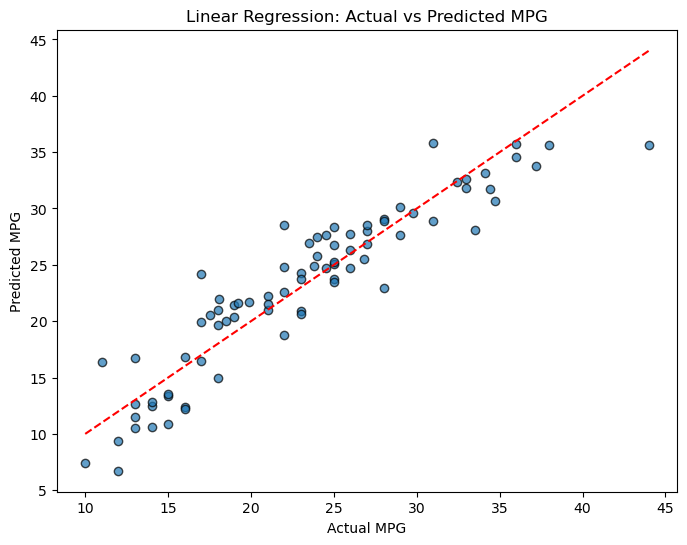

In [1584]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Linear Regression: Actual vs Predicted MPG")
plt.show()